First importing the needed packages.

In [132]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme()

In [143]:
# Load test and train .npy files from data/processed
X_train = np.load('data/processed/X_train.npy')
X_test = np.load('data/processed/X_test.npy')
y_train = np.load('data/processed/y_train.npy')
y_test = np.load('data/processed/y_test.npy')

In [144]:
X_train.shape
y_train.shape

(24000, 3)


## Model

### Iteration 1

The CNN model is defined below. As this is a basic tutorial-type of CNN task, the architecture is also very simple, with a cookie-cutter type of model class.
Most of the code in the model was generated via ChatGPT. There are some basic convolutional layers mixed with Max Pooling after each convolution. The architecture is a typical "bottleneck" shape with decreasing output dimensions until the dense layers flatten the activations to a 1D array. The max pooling layer is downsampling (dimension-reducing) layer which picks up the **maximum value** (=most important features) from a particular pooling window, the size of which you can see defined below.



Adam's optimizer is a very common neural net optimizer with an equally common learning rate of 0.001. `categorical_crossentropy` is also a common choice for a multi-class loss function. Softmax is a good activation function for classification as it scales all values to be between 0 and 1 (similar to probabilities). 






It might turn out that the model does not work optimally with this configuration, and further model tuning should be done. However, as model optimization is not the aim of this tutorial notebook, it is left for later opportunities.

In [140]:
class CNN:
    def __init__(self, num_classes):
        self.model = Sequential()
        self.model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dense(num_classes, activation='softmax'))

        optimizer = Adam(learning_rate=0.001)
        self.model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
    def train(self, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
        return self.model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Below we initialize the model and visualize its contents. The summary shows all the layers and the data output shapes after each layer.

In [142]:
model = CNN(y_test.shape[1])
model.model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 198, 198, 32)      │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 99, 99, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_13 (Conv2D)              │ (None, 97, 97, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 48, 48, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_6 (Flatten)             │ (None, 147456)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_12 (Dense)                │ (None, 128)               │ 18,874,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_13 (Dense)                │ (None, 3)                 │        387 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 18,894,275 (72.08 MB)

 Trainable params: 18,894,275 (72.08 MB)

 Non-trainable params: 0 (0.00 B)

Next we train the model. We allow for default batch sizes (the size of data is so small the batch sizes are not that important here, but could be relevant for more computationally intensive models), and 10 epochs as a good starting point. To start, lets fit the model with only half of the training data for slightly faster training.

In [80]:
data_size = 5000
history = model.train(X_train[:data_size], y_train[:data_size], X_test, y_test, epochs=10, batch_size=100)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5225 - loss: 0.9734 - val_accuracy: 0.5275 - val_loss: 0.9609
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6019 - loss: 0.8365 - val_accuracy: 0.5380 - val_loss: 0.9520
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6997 - loss: 0.7033 - val_accuracy: 0.5305 - val_loss: 0.9959
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7721 - loss: 0.5684 - val_accuracy: 0.5445 - val_loss: 1.0476
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8315 - loss: 0.4385 - val_accuracy: 0.5495 - val_loss: 1.0831
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8897 - loss: 0.3239 - val_accuracy: 0.5500 - val_loss: 1.1574
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9227 - loss: 0.2425 - val_accuracy: 0.5550 - val_loss: 1.2729
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 991ms/step - accuracy: 0.9498 - loss: 0.1701 - val_accuracy: 0.5580 - val_lo

### Validation and analysis

Based on the trianing metrics above, the model seems to be quite clearly overfitting - training accuracy increases to be very high while validation accuracy lags behind. This can be confirmed with the error plots below, showing that in fact validation error starts increasing with increasing number of epochs.

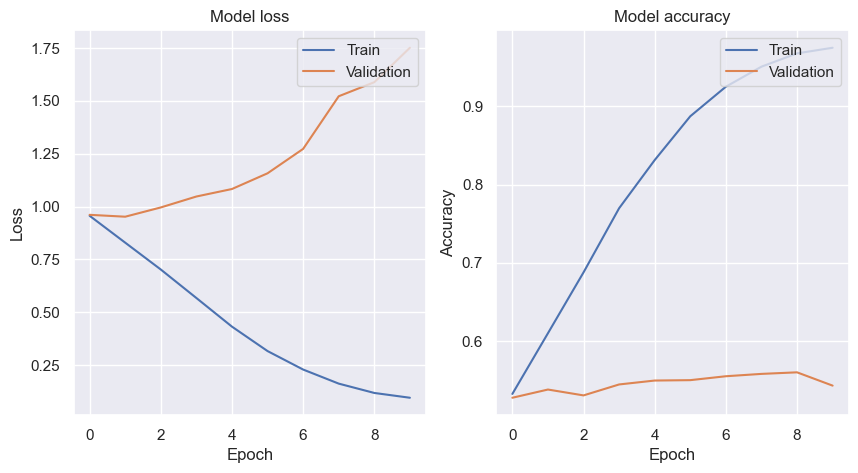

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot loss
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper right')

# Plot accuracy
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

We can use several techniques to try to avoid this, including data augmentation, dropouts, early stopping, regularization, and batch normalization. Further, we can increase the amount of training data. Of these, dropouts, batch normalization, and early stopping are very easy to implement. Therefore, we can test how the model performs with these implementations. We will drop out 0.2 (20%) or neurons as it is a typical and quite conservative value for a dropout rate.

Below is the same model with the aforementioned techniques implemented.

In [85]:
class CNN:
    def __init__(self, num_classes):
        self.model = Sequential()
        self.model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(BatchNormalization())
        self.model.add(Dropout(0.2))

        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(BatchNormalization())
        self.model.add(Dropout(0.2))

        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dropout(0.2))
        self.model.add(Dense(num_classes, activation='softmax'))

        optimizer = Adam(learning_rate=0.001)
        self.model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
    def train(self, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
        return self.model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

In [111]:
model1 = CNN(y_test.shape[1])
model1.model.summary()


/Users/rasmus.siljander/opt/anaconda3/envs/shape_recognition/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 198, 198, 32)      │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 99, 99, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ (None, 99, 99, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 99, 99, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_7 (Conv2D)               │ (None, 97, 97, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 48, 48, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_3           │ (None, 48, 48, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_4 (Dropout)             │ (None, 48, 48, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_3 (Flatten)             │ (None, 147456)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 128)               │ 18,874,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_5 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 3)                 │        387 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 18,894,659 (72.08 MB)

 Trainable params: 18,894,467 (72.08 MB)

 Non-trainable params: 192 (768.00 B)

In [113]:

data_size = 10000
history = model1.train(X_train[:data_size], y_train[:data_size], X_test, y_test, epochs=10, batch_size=100)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.4547 - loss: 16.5100 - val_accuracy: 0.3535 - val_loss: 1.8022
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.4902 - loss: 1.9400 - val_accuracy: 0.3815 - val_loss: 1.0808
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5267 - loss: 0.9525 - val_accuracy: 0.4295 - val_loss: 1.0576
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.5725 - loss: 0.8631 - val_accuracy: 0.4345 - val_loss: 1.0357
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.5693 - loss: 0.8470 - val_accuracy: 0.4485 - val_loss: 1.0170
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6041 - loss: 0.7946 - val_accuracy: 0.4960 - val_loss: 0.9717
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6247 - loss: 0.7697 - val_accuracy: 0.5080 - val_loss: 0.9532
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.6267 - loss: 0.7619 - val_accuracy: 0.5210 - val_loss

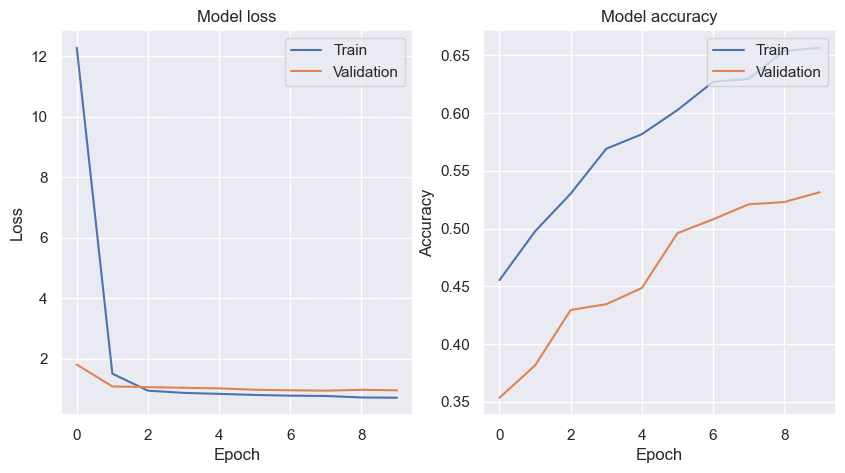

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot loss
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper right')

# Plot accuracy
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

Here the learning curves are more in line. Still the curves are not perfect, but at least there is no significant divergence of errors or losses. Lets check performance on random validation shapes: 

In [125]:
np.random.seed(1)

# Select 4 random indices from X_test
random_indices = np.random.choice(len(X_test), size=4, replace=False)

# Get the corresponding examples from X_test and y_test
random_X_test = X_test[random_indices]
random_y_test = y_test[random_indices]

# Print the random examples
print(random_X_test.shape)
print(random_y_test)

(4, 200, 200, 3)
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


And below mapping to what each ground truth vector means.

In [126]:
mapping = {
    "Circle": [1., 0., 0.],
    "Square": [0., 1., 0.],
    "Triangle": [0., 0., 1.]
}
shapes = ["Circle", "Square", "Triangle"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[0.60523283 0.35251647 0.04225069]
[0. 1. 0.]
Predicted: Circle
Actual: Square

[0.29222965 0.34606564 0.3617047 ]
[0. 0. 1.]
Predicted: Triangle
Actual: Triangle

[0.29473144 0.34908238 0.35618615]
[1. 0. 0.]
Predicted: Triangle
Actual: Circle

[1.0000000e+00 6.5969463e-10 2.7387155e-36]
[1. 0. 0.]
Predicted: Circle
Actual: Circle



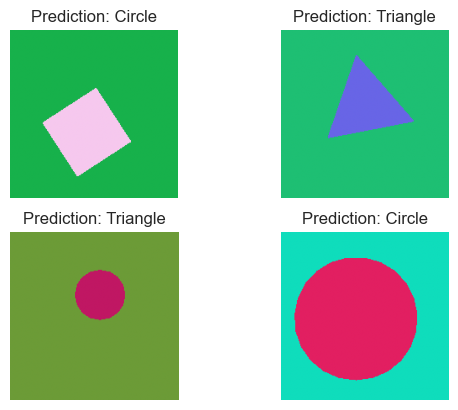

In [127]:
fig, axs = plt.subplots(2,2)


predictions = model1.model.predict(random_X_test)

for i in range(len(random_X_test)):
    prediction = predictions[i]
    print(prediction)
    print(random_y_test[i])
    predicted_label = shapes[np.argmax(prediction)]
    print(f"Predicted: {predicted_label}")

    actual_label = shapes[np.argmax(random_y_test[i])]
    print(f"Actual: {actual_label}")
    print()
    axs[i//2, i%2].imshow(random_X_test[i])
    axs[i//2, i%2].set_title(f"Prediction: {predicted_label}")
    axs[i//2, i%2].axis('off')

plt.show()


We can see that of the four example, two were correctly predicted, which is approximately in line with the accuracy of a bit over 50%. This is still not optimal, but considering that this was a playground example, and we only trained 10 epochs, the results are satisfactory. Furhter, since the error curves have not yet plateaued, it is possible that longer training times could lead to better performance, especially considering the heavy-ish overfitting techniques that we implemented into the data. Comparing the drop in training accuracy when compared to previous iterations, it could be that the model has not finished learning yet.

In [128]:
model2 = CNN(y_test.shape[1])
model2.model.summary()


/Users/rasmus.siljander/opt/anaconda3/envs/shape_recognition/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 198, 198, 32)      │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 99, 99, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_4           │ (None, 99, 99, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_6 (Dropout)             │ (None, 99, 99, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_9 (Conv2D)               │ (None, 97, 97, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 48, 48, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_5           │ (None, 48, 48, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_7 (Dropout)             │ (None, 48, 48, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_4 (Flatten)             │ (None, 147456)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_8 (Dense)                 │ (None, 128)               │ 18,874,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_8 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_9 (Dense)                 │ (None, 3)                 │        387 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 18,894,659 (72.08 MB)

 Trainable params: 18,894,467 (72.08 MB)

 Non-trainable params: 192 (768.00 B)

In [130]:
history2 = model2.train(X_train[:], y_train[:], X_test, y_test, epochs=20, batch_size=50)

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 88s 547ms/step - accuracy: 0.6208 - loss: 0.7824 - val_accuracy: 0.5170 - val_loss: 0.9492
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 87s 546ms/step - accuracy: 0.6241 - loss: 0.7941 - val_accuracy: 0.5180 - val_loss: 0.9797
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 92s 572ms/step - accuracy: 0.6484 - loss: 0.7305 - val_accuracy: 0.5260 - val_loss: 0.9447
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 88s 547ms/step - accuracy: 0.6467 - loss: 0.7273 - val_accuracy: 0.5150 - val_loss: 0.9534
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 87s 544ms/step - accuracy: 0.6396 - loss: 0.7415 - val_accuracy: 0.5600 - val_loss: 1.0210
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 86s 539ms/step - accuracy: 0.6777 - loss: 0.6938 - val_accuracy: 0.5510 - val_loss: 1.0988
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 89s 554ms/step - accuracy: 0.6919 - loss: 0.6352 - val_accuracy: 0.5370 - val_loss: 1.0128
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 89s 556ms/step - accuracy: 0.7034 - loss: 0

KeyboardInterrupt: 

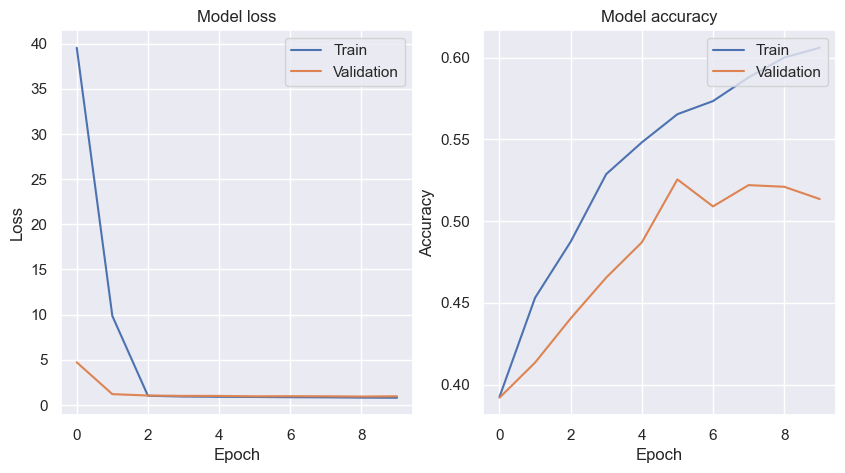

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot loss
ax[0].plot(history2.history['loss'])
ax[0].plot(history2.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper right')

# Plot accuracy
ax[1].plot(history2.history['accuracy'])
ax[1].plot(history2.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

GitHub Copilot: There are several strategies you can use to reduce overfitting in a Convolutional Neural Network (CNN):

1. **Data Augmentation**: This technique involves creating new training samples by applying random transformations (like rotation, scaling, translation, etc.) to the existing images in your training dataset. This can help improve the model's ability to generalize.

2. **Dropout**: This is a regularization technique where randomly selected neurons are ignored during training, which helps to prevent over-dependence on any single neuron and promotes generalization.

3. **Early Stopping**: In this method, you monitor the model's performance on the validation set during training and stop training when the validation performance starts to degrade.

4. **Regularization**: This involves adding a penalty to the loss function to discourage complex models. L1 and L2 are common types of regularization.

5. **Batch Normalization**: This technique normalizes the activations of the neurons in a layer on a per-batch basis. It can make your network faster and more stable.

Here's an example of how you can implement some of these techniques in Keras:

```python
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())  # Batch Normalization layer
model.add(Dropout(0.25))  # Dropout layer

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with L2 regularization
from keras.regularizers import l2
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], kernel_regularizer=l2(0.01))
```

Remember to replace `'num_classes'` with the actual number of classes in your problem. Also, adjust the dropout rates and the regularization factor according to your specific needs.

<Axes: >

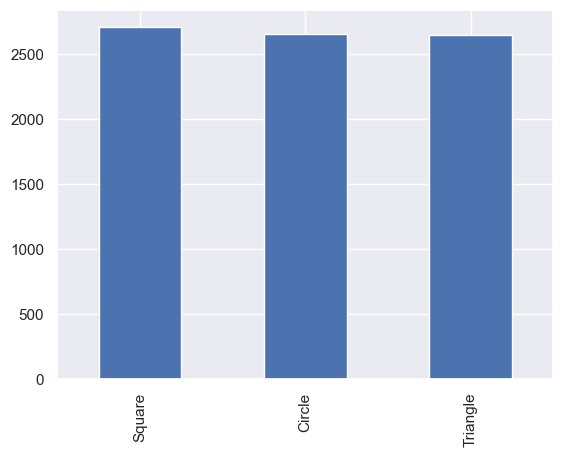

In [78]:
# y_train_series = pd.Series(y_train[:10000])

# # Get the value counts of each label
# label_counts = y_train_series.value_counts()

# # Plot the bar chart
# label_counts.plot(kind='bar')


Lets see some predictions that the model makes on random test examples

In [107]:
y_test_encoded[:4]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [108]:
y_test[:10]

array(['Square', 'Triangle', 'Triangle', 'Square', 'Triangle', 'Circle',
       'Circle', 'Triangle', 'Triangle', 'Circle'], dtype='<U8')